In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [2]:
Big_Data = pd.read_csv("Aircraft_Incident_dataset.csv")
Big_Data.head()

,Incident_Date,Aircraft_Model,Aircaft_Registration,Aircraft_Operator,Aircraft_Nature,Incident_Category,Incident_Cause(es),Incident_Location,Aircraft_Damage_Type,Date,...,Onboard_Crew,Onboard_Passengers,Onboard_Total,Fatalities,Aircraft_First_Flight,Aircraft_Phase,Departure_Airport,Destination_Airport,Ground_Casualties,Collision_Casualties
0,3/1/2022,British Aerospace 4121 Jetstream 41,ZS-NRJ,SA Airlink,Domestic Non Scheduled Passenger,Accident | repairable-damage,"Airplane - Engines, Airplane - Engines - Prop/...",near Venetia Mine...,Substantial,Monday 3 January 2022,...,Fatalities: 0 / Occupants: 3,Fatalities: 0 / Occupants: 4,Fatalities: 0 / Occupants: 7,0,1995-05-19 (26 years 8 months),Landing (LDG),Johannesburg-O.R. Tambo International Airport ...,"Venetia Mine Airport (FAVM) , South Africa",NaN,NaN
1,4/1/2022,British Aerospace 3101 Jetstream 31,HR-AYY,LANHSA,Domestic Scheduled Passenger,Accident | repairable-damage,"Airplane - Undercarriage, Airplane - Undercarr...",Roatán-Juan ...,Substantial,Tuesday 4 January 2022,...,Fatalities: 0 / Occupants:,Fatalities: 0 / Occupants:,Fatalities: 0 / Occupants: 19,0,1985,Landing (LDG),La Ceiba-Goloson International Airport (LCE/MH...,Roatán-Juan Manuel Gálvez International Airpor...,NaN,NaN
2,5/1/2022,Boeing 737-4H6,EP-CAP,Caspian Airlines,Domestic Scheduled Passenger,Accident | repairable-damage,"Airplane - Undercarriage, Airplane - Undercarr...",Isfahan-Shah...,Substantial,Wednesday 5 January 2022,...,Fatalities: 0 / Occupants:,Fatalities: 0 / Occupants:,Fatalities: 0 / Occupants: 116,0,1992-09-18 (29 years 4 months),Landing (LDG),"Mashhad Airport (MHD/OIMM) , Iran","Isfahan-Shahid Beheshti Airport (IFN/OIFM) , Iran",NaN,NaN
3,8/1/2022,Tupolev Tu-204-100C,RA-64032,"Cainiao, opb Aviastar-TU",Cargo,Accident | hull-loss,"Cargo - Fire/smoke, Result - Damaged on the gr...",Hangzhou-Xia...,Destroyed,Saturday 8 January 2022,...,Fatalities: 0 / Occupants: 8,Fatalities: 0 / Occupants: 0,Fatalities: 0 / Occupants: 8,0,2002-07-18 (19 years 6 months),Standing (STD),Hangzhou-Xiaoshan International Airport (HGH/Z...,"Novosibirsk-Tolmachevo Airport (OVB/UNNT) , Ru...",NaN,NaN
4,12/1/2022,Beechcraft 200 Super King Air,NaN,private,Illegal Flight,"Criminal occurrence (sabotage, shoot down) | h...",Result - Damaged on the ground,"Machakilha, ...",Damaged beyond repair,Wednesday 12 January 2022,...,Fatalities: 0 / Occupants: 0,Fatalities: 0 / Occupants: 0,Fatalities: 0 / Occupants: 0,0,NaN,Standing (STD),?,?,NaN,NaN


In [3]:
Big_Data.describe()

,Fatalities
count,23519.000000
mean,5.611931
std,22.205937
min,0.000000
25%,0.000000
50%,0.000000
75%,4.000000
max,1692.000000


In [4]:
Big_Data.shape

(23519, 23)

In [5]:
Aircraft = pd.DataFrame(Big_Data[["Date", "Aircraft_Model", "Aircraft_Nature", "Incident_Category", "Incident_Cause(es)", "Aircraft_Damage_Type", "Aircraft_First_Flight"]])

In [6]:
Aircraft.head()

,Date,Aircraft_Model,Aircraft_Nature,Incident_Category,Incident_Cause(es),Aircraft_Damage_Type,Aircraft_First_Flight
0,Monday 3 January 2022,British Aerospace 4121 Jetstream 41,Domestic Non Scheduled Passenger,Accident | repairable-damage,"Airplane - Engines, Airplane - Engines - Prop/...",Substantial,1995-05-19 (26 years 8 months)
1,Tuesday 4 January 2022,British Aerospace 3101 Jetstream 31,Domestic Scheduled Passenger,Accident | repairable-damage,"Airplane - Undercarriage, Airplane - Undercarr...",Substantial,1985
2,Wednesday 5 January 2022,Boeing 737-4H6,Domestic Scheduled Passenger,Accident | repairable-damage,"Airplane - Undercarriage, Airplane - Undercarr...",Substantial,1992-09-18 (29 years 4 months)
3,Saturday 8 January 2022,Tupolev Tu-204-100C,Cargo,Accident | hull-loss,"Cargo - Fire/smoke, Result - Damaged on the gr...",Destroyed,2002-07-18 (19 years 6 months)
4,Wednesday 12 January 2022,Beechcraft 200 Super King Air,Illegal Flight,"Criminal occurrence (sabotage, shoot down) | h...",Result - Damaged on the ground,Damaged beyond repair,NaN


In [7]:
Aircraft = Aircraft.dropna()
Aircraft = Aircraft.drop(Aircraft.index[Aircraft['Incident_Category'] == 'Criminal occurrence (sabotage, shoot down) | hull-loss'], inplace = False)
Aircraft = Aircraft.drop(Aircraft.index[Aircraft['Incident_Cause(es)'] == 'Info-Unavailable'], inplace = False)
Aircraft = Aircraft.drop(Aircraft.index[Aircraft['Incident_Category'] == 'other occurrence (ground fire, sabotage) | hull-loss'], inplace = False)
Aircraft = Aircraft.drop(Aircraft.index[Aircraft['Incident_Category'] == 'Hijacking | repairable-damage'], inplace = False)
Aircraft.shape

(9356, 7)

In [8]:
print(Aircraft)

                           Date                       Aircraft_Model  \
0         Monday 3 January 2022  British Aerospace 4121 Jetstream 41   
1        Tuesday 4 January 2022  British Aerospace 3101 Jetstream 31   
2      Wednesday 5 January 2022                       Boeing 737-4H6   
3       Saturday 8 January 2022                  Tupolev Tu-204-100C   
5      Saturday 22 January 2022                      Airbus A320-232   
...                         ...                                  ...   
23496        Monday 14 May 1923                  Farman F.60 Goliath   
23500     Monday 27 August 1923                  Farman F.60 Goliath   
23505       Friday 7 April 1922                  Farman F.60 Goliath   
23513   Monday 23 February 1920                     Handley Page O/7   
23515    Wednesday 30 June 1920                   Handley Page O/400   

                         Aircraft_Nature             Incident_Category  \
0       Domestic Non Scheduled Passenger  Accident | repairab

In [9]:
print(Aircraft['Date'].head())

0       Monday 3 January 2022
1      Tuesday 4 January 2022
2    Wednesday 5 January 2022
3     Saturday 8 January 2022
5    Saturday 22 January 2022
Name: Date, dtype: object


In [10]:
Aircraft['Date'].dtype

dtype('O')

In [11]:
Aircraft['Aircraft_First_Flight'] = Aircraft['Aircraft_First_Flight'].str.split(' ').str[0]
print(Aircraft['Aircraft_First_Flight'])

0        1995-05-19
1              1985
2        1992-09-18
3        2002-07-18
5        2008-10-07
            ...    
23496          1922
23500          1922
23505          1920
23513          1919
23515          1919
Name: Aircraft_First_Flight, Length: 9356, dtype: object


In [12]:
Aircraft['Aircraft_First_Flight'] = pd.to_datetime(Aircraft['Aircraft_First_Flight'])
Aircraft['Aircraft_First_Flight'] = Aircraft['Aircraft_First_Flight'].dt.strftime('%Y-%m-%d')
Aircraft['Aircraft_First_Flight'] = Aircraft['Aircraft_First_Flight'].str.split('-').str[0]
Aircraft.head()

,Date,Aircraft_Model,Aircraft_Nature,Incident_Category,Incident_Cause(es),Aircraft_Damage_Type,Aircraft_First_Flight
0,Monday 3 January 2022,British Aerospace 4121 Jetstream 41,Domestic Non Scheduled Passenger,Accident | repairable-damage,"Airplane - Engines, Airplane - Engines - Prop/...",Substantial,1995
1,Tuesday 4 January 2022,British Aerospace 3101 Jetstream 31,Domestic Scheduled Passenger,Accident | repairable-damage,"Airplane - Undercarriage, Airplane - Undercarr...",Substantial,1985
2,Wednesday 5 January 2022,Boeing 737-4H6,Domestic Scheduled Passenger,Accident | repairable-damage,"Airplane - Undercarriage, Airplane - Undercarr...",Substantial,1992
3,Saturday 8 January 2022,Tupolev Tu-204-100C,Cargo,Accident | hull-loss,"Cargo - Fire/smoke, Result - Damaged on the gr...",Destroyed,2002
5,Saturday 22 January 2022,Airbus A320-232,Domestic Scheduled Passenger,Accident | repairable-damage,"Landing/takeoff - Tailstrike, Result - Runway ...",Substantial,2008


In [13]:
Aircraft['Date'] = Aircraft['Date'].str.split(' ').str[3]
print(Aircraft['Date'])

0        2022
1        2022
2        2022
3        2022
5        2022
         ... 
23496    1923
23500    1923
23505    1922
23513    1920
23515    1920
Name: Date, Length: 9356, dtype: object


In [14]:
Aircraft.head()

,Date,Aircraft_Model,Aircraft_Nature,Incident_Category,Incident_Cause(es),Aircraft_Damage_Type,Aircraft_First_Flight
0,2022,British Aerospace 4121 Jetstream 41,Domestic Non Scheduled Passenger,Accident | repairable-damage,"Airplane - Engines, Airplane - Engines - Prop/...",Substantial,1995
1,2022,British Aerospace 3101 Jetstream 31,Domestic Scheduled Passenger,Accident | repairable-damage,"Airplane - Undercarriage, Airplane - Undercarr...",Substantial,1985
2,2022,Boeing 737-4H6,Domestic Scheduled Passenger,Accident | repairable-damage,"Airplane - Undercarriage, Airplane - Undercarr...",Substantial,1992
3,2022,Tupolev Tu-204-100C,Cargo,Accident | hull-loss,"Cargo - Fire/smoke, Result - Damaged on the gr...",Destroyed,2002
5,2022,Airbus A320-232,Domestic Scheduled Passenger,Accident | repairable-damage,"Landing/takeoff - Tailstrike, Result - Runway ...",Substantial,2008


In [15]:
Aircraft = Aircraft.dropna()
Aircraft['Date'] = Aircraft['Date'].astype(int)
Aircraft['Aircraft_First_Flight'] = Aircraft['Aircraft_First_Flight'].astype(int)
Aircraft.head()

,Date,Aircraft_Model,Aircraft_Nature,Incident_Category,Incident_Cause(es),Aircraft_Damage_Type,Aircraft_First_Flight
0,2022,British Aerospace 4121 Jetstream 41,Domestic Non Scheduled Passenger,Accident | repairable-damage,"Airplane - Engines, Airplane - Engines - Prop/...",Substantial,1995
1,2022,British Aerospace 3101 Jetstream 31,Domestic Scheduled Passenger,Accident | repairable-damage,"Airplane - Undercarriage, Airplane - Undercarr...",Substantial,1985
2,2022,Boeing 737-4H6,Domestic Scheduled Passenger,Accident | repairable-damage,"Airplane - Undercarriage, Airplane - Undercarr...",Substantial,1992
3,2022,Tupolev Tu-204-100C,Cargo,Accident | hull-loss,"Cargo - Fire/smoke, Result - Damaged on the gr...",Destroyed,2002
5,2022,Airbus A320-232,Domestic Scheduled Passenger,Accident | repairable-damage,"Landing/takeoff - Tailstrike, Result - Runway ...",Substantial,2008


In [16]:
Aircraft['Aircraft_First_Flight'] = Aircraft["Date"] - Aircraft["Aircraft_First_Flight"]
Aircraft = Aircraft.rename(columns={"Aircraft_First_Flight":"Aircraft_Age"})
Aircraft = Aircraft.rename(columns={"Incident_Cause(es)":"Incident_Causes"})
Aircraft = Aircraft[Aircraft['Date'] > 2000] 
Aircraft.head()

,Date,Aircraft_Model,Aircraft_Nature,Incident_Category,Incident_Causes,Aircraft_Damage_Type,Aircraft_Age
0,2022,British Aerospace 4121 Jetstream 41,Domestic Non Scheduled Passenger,Accident | repairable-damage,"Airplane - Engines, Airplane - Engines - Prop/...",Substantial,27
1,2022,British Aerospace 3101 Jetstream 31,Domestic Scheduled Passenger,Accident | repairable-damage,"Airplane - Undercarriage, Airplane - Undercarr...",Substantial,37
2,2022,Boeing 737-4H6,Domestic Scheduled Passenger,Accident | repairable-damage,"Airplane - Undercarriage, Airplane - Undercarr...",Substantial,30
3,2022,Tupolev Tu-204-100C,Cargo,Accident | hull-loss,"Cargo - Fire/smoke, Result - Damaged on the gr...",Destroyed,20
5,2022,Airbus A320-232,Domestic Scheduled Passenger,Accident | repairable-damage,"Landing/takeoff - Tailstrike, Result - Runway ...",Substantial,14


In [17]:
Aircraft.shape

(3101, 7)

In [18]:
print(Aircraft.Incident_Causes.value_counts())

Result - Runway excursion                                                                                                                             497
Result - Loss of control                                                                                                                              174
Result - Damaged on the ground                                                                                                                        132
Collision - Aircraft, Collision - Aircraft - On ground (platform), Result - Damaged on the ground                                                     121
Result - CFIT - Hill, mountain                                                                                                                        105
                                                                                                                                                     ... 
Maintenance - Wrong installation of parts, Result - Runway excursion        

In [19]:
print(Aircraft.Aircraft_Model.value_counts())

Cessna 208B Grand Caravan                   166
Antonov An-2R                                70
de Havilland Canada DHC-6 Twin Otter 300     69
Beechcraft 200 Super King Air                43
Swearingen SA227-AC Metro III                38
                                           ... 
Boeing 737-8GK (WL)                           1
Beechcraft MC-12W Liberty (King Air 350)      1
Boeing 747-428BCF                             1
Boeing KC-137E (707-324C)                     1
Boeing 747-128 (SF)                           1
Name: Aircraft_Model, Length: 1013, dtype: int64


In [20]:
print(Aircraft.Incident_Category.value_counts())

Accident | hull-loss                                              1849
Accident | repairable-damage                                      1190
other occurrence (ground fire, sabotage) | repairable-damage        38
Criminal occurrence (sabotage, shoot down) | repairable-damage      12
Incident | repairable-damage                                         8
Hijacking | hull-loss                                                4
Name: Incident_Category, dtype: int64


In [21]:
## Dropped all unrelated incidents -> Criminal activities
Aircraft = Aircraft.drop(Aircraft.index[Aircraft['Incident_Category'] == 'Hijacking | hull-loss'], inplace = False)
Aircraft = Aircraft.drop(Aircraft.index[Aircraft['Incident_Category'] == 'Criminal occurrence (sabotage, shoot down) | repairable-damage'], inplace = False)
Aircraft = Aircraft.drop(Aircraft.index[Aircraft['Incident_Category'] == 'Criminal occurrence (sabotage, shoot down) | hull-loss'], inplace = False)
Aircraft = Aircraft.drop(Aircraft.index[Aircraft['Incident_Category'] == 'other occurrence (ground fire, sabotage) | repairable-damage'], inplace = False)
Aircraft = Aircraft.drop(Aircraft.index[Aircraft['Incident_Category'] == 'Incident | repairable-damage'], inplace = False)

In [22]:
print(Aircraft.Incident_Category.value_counts())

Accident | hull-loss            1849
Accident | repairable-damage    1190
Name: Incident_Category, dtype: int64


In [23]:
Aircraft.shape

(3039, 7)

In [24]:
print(Aircraft.Incident_Causes.value_counts())

Result - Runway excursion                                                                                                                             496
Result - Loss of control                                                                                                                              174
Collision - Aircraft, Collision - Aircraft - On ground (platform), Result - Damaged on the ground                                                     116
Result - CFIT - Hill, mountain                                                                                                                        105
Result - Damaged on the ground                                                                                                                        104
                                                                                                                                                     ... 
Flightcrew - Non adherence to procedures, Landing/takeoff - Landing, Landing

In [25]:
Aircraft.head()

,Date,Aircraft_Model,Aircraft_Nature,Incident_Category,Incident_Causes,Aircraft_Damage_Type,Aircraft_Age
0,2022,British Aerospace 4121 Jetstream 41,Domestic Non Scheduled Passenger,Accident | repairable-damage,"Airplane - Engines, Airplane - Engines - Prop/...",Substantial,27
1,2022,British Aerospace 3101 Jetstream 31,Domestic Scheduled Passenger,Accident | repairable-damage,"Airplane - Undercarriage, Airplane - Undercarr...",Substantial,37
2,2022,Boeing 737-4H6,Domestic Scheduled Passenger,Accident | repairable-damage,"Airplane - Undercarriage, Airplane - Undercarr...",Substantial,30
3,2022,Tupolev Tu-204-100C,Cargo,Accident | hull-loss,"Cargo - Fire/smoke, Result - Damaged on the gr...",Destroyed,20
5,2022,Airbus A320-232,Domestic Scheduled Passenger,Accident | repairable-damage,"Landing/takeoff - Tailstrike, Result - Runway ...",Substantial,14


In [26]:
print(Aircraft.Incident_Causes.value_counts())

Result - Runway excursion                                                                                                                             496
Result - Loss of control                                                                                                                              174
Collision - Aircraft, Collision - Aircraft - On ground (platform), Result - Damaged on the ground                                                     116
Result - CFIT - Hill, mountain                                                                                                                        105
Result - Damaged on the ground                                                                                                                        104
                                                                                                                                                     ... 
Flightcrew - Non adherence to procedures, Landing/takeoff - Landing, Landing

In [27]:
Human_Flightcrew = Aircraft[Aircraft['Incident_Causes'].str.contains("Flightcrew")]
Human_Maintenance = Aircraft[Aircraft['Incident_Causes'].str.contains("Maintenance")]
Human_ATC = Aircraft[Aircraft['Incident_Causes'].str.contains("ATC")]
Human_Flightcrew.shape

(123, 7)

In [28]:
Human_Maintenance.shape

(52, 7)

In [29]:
Human_ATC.shape

(36, 7)

In [30]:
#Classifying as human error
Aircraft.loc[Aircraft['Incident_Causes'].str.contains("Flightcrew"), 'Incident_Causes'] = 'Human Error'
Aircraft.loc[Aircraft['Incident_Causes'].str.contains("Maintenance"), 'Incident_Causes'] = 'Human Error'
Aircraft.loc[Aircraft['Incident_Causes'].str.contains("ATC"), 'Incident_Causes'] = 'Human Error'
Aircraft.loc[Aircraft['Incident_Causes'].str.contains("Cargo"), 'Incident_Causes'] = 'Human Error'
Aircraft.loc[Aircraft['Incident_Causes'].str.contains("CFIT"), 'Incident_Causes'] = 'Human Error'

In [31]:
#All other classification
Aircraft.loc[Aircraft['Incident_Causes'].str.contains("Weather"), 'Incident_Causes'] = 'Weather'
Aircraft.loc[Aircraft['Incident_Causes'].str.contains("Collision - Object"), 'Incident_Causes'] = 'Collision - Object'
Aircraft.loc[Aircraft['Incident_Causes'].str.contains("Cargo door"), 'Incident_Causes'] = 'Cargo Door'
Aircraft.loc[Aircraft['Incident_Causes'].str.contains("Fuselage"), 'Incident_Causes'] = 'Fuselage'
Aircraft.loc[Aircraft['Incident_Causes'].str.contains("Passenger door"), 'Incident_Causes'] = 'Passenger door'
Aircraft.loc[Aircraft['Incident_Causes'].str.contains("Tail"), 'Incident_Causes'] = 'Tail'
Aircraft.loc[Aircraft['Incident_Causes'].str.contains("Wing"), 'Incident_Causes'] = 'Wing'
Aircraft.loc[Aircraft['Incident_Causes'].str.contains("Undercarriage - Landing gear collapse"), 'Incident_Causes'] = 'Undercarriage - Landing gear collapse'
Aircraft.loc[Aircraft['Incident_Causes'].str.contains("Undercarriage - Gear-up landing"), 'Incident_Causes'] = 'Undercarriage - Gear-up landing'
Aircraft.loc[Aircraft['Incident_Causes'].str.contains("Engines - All engine powerloss"), 'Incident_Causes'] = 'Engines - All engine powerloss'
Aircraft.loc[Aircraft['Incident_Causes'].str.contains("Collision - Aircraft - On ground (platform)"), 'Incident_Causes'] = 'Collision - Onground (platform)'
Aircraft.loc[Aircraft['Incident_Causes'].str.contains("Engines - Fuel contamination"), 'Incident_Causes'] = 'Engines - Fuel contamination'
Aircraft.loc[Aircraft['Incident_Causes'].str.contains("Undercarriage - Brakes"), 'Incident_Causes'] = 'Undercarriage - Brakes'
Aircraft.loc[Aircraft['Incident_Causes'].str.contains("Collision - Aircraft"), 'Incident_Causes'] = 'Collision - Aircraft'
Aircraft.loc[Aircraft['Incident_Causes'].str.contains("Airplane - Undercarriage - Tire failure"), 'Incident_Causes'] = 'Airplane - Undercarriage - Tire failure'
Aircraft.loc[Aircraft['Incident_Causes'].str.contains("Fire - Inflight"), 'Incident_Causes'] = 'Fire - Inflight'
Aircraft.loc[Aircraft['Incident_Causes'].str.contains("Engines - Fire"), 'Incident_Causes'] = 'Engine - Fire'
Aircraft.loc[Aircraft['Incident_Causes'].str.contains("Engines - Uncontained failure"), 'Incident_Causes'] = 'Engine - Uncontained failure'
Aircraft.loc[Aircraft['Incident_Causes'].str.contains("Fire - Hangar"), 'Incident_Causes'] = 'Fire'
Aircraft.loc[Aircraft['Incident_Causes'].str.contains("Fire - Fire"), 'Incident_Causes'] = 'Fire'


C:\Users\Theo\AppData\Local\Temp/ipykernel_5916/2715659920.py:12: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  Aircraft.loc[Aircraft['Incident_Causes'].str.contains("Collision - Aircraft - On ground (platform)"), 'Incident_Causes'] = 'Collision - Onground (platform)'


In [32]:
Aircraft = Aircraft.drop(Aircraft.index[Aircraft['Incident_Causes'] == 'Unknown - Missing'], inplace = False)
Aircraft = Aircraft.drop(Aircraft.index[Aircraft['Incident_Causes'] == 'Result - Loss of control, Security - Shot, Security - Shot - Surface-to-air'], inplace = False)

In [33]:
ones = Aircraft.Incident_Causes.value_counts()<10
Aircraft = Aircraft[~Aircraft['Incident_Causes'].isin(ones[ones==1].index)]
Aircraft.shape

(2765, 7)

In [34]:
Aircraft.loc[Aircraft['Incident_Causes'].str.contains("Landing - Heavy"), 'Incident_Causes'] = 'Landing - Heavy'
Aircraft.loc[Aircraft['Incident_Causes'].str.contains("Unstabilized approach"), 'Incident_Causes'] = 'Landing - Unstabilized approach'
Aircraft.loc[Aircraft['Incident_Causes'].str.contains("Engines - Fuel starvation"), 'Incident_Causes'] = 'Engines - Fuel starvation'
Aircraft.loc[Aircraft['Incident_Causes'].str.contains("Airplane - Engines"), 'Incident_Causes'] = 'Engine Failure'
Aircraft.loc[Aircraft['Incident_Causes'].str.contains("Landing/takeoff - Landing, Landing/takeoff - Landing - Late, far down rwy, Result - Runway excursion"), 'Incident_Causes'] = 'Human Error'
Aircraft.loc[Aircraft['Incident_Causes'].str.contains("Landing/takeoff - Landing, Landing/takeoff - Landing - Fast, Result - Runway excursion"), 'Incident_Causes'] = 'Human Error'
Aircraft.loc[Aircraft['Incident_Causes'].str.contains("Landing - Heavy"), 'Incident_Causes'] = 'Human Error'

In [35]:
Aircraft = Aircraft.drop(Aircraft.index[Aircraft['Incident_Causes'] == 'Landing/takeoff - Takeoff - Aborted, Result - Runway excursion'], inplace = False)
Aircraft = Aircraft.drop(Aircraft.index[Aircraft['Incident_Causes'] == 'Landing/takeoff - Landing, Landing/takeoff - Landing - Bounced, Result - Runway mishap'], inplace = False)
Aircraft = Aircraft.drop(Aircraft.index[Aircraft['Incident_Causes'] == 'Result - Runway excursion'], inplace = False)
Aircraft = Aircraft.drop(Aircraft.index[Aircraft['Incident_Causes'] == 'Result - Loss of control'], inplace = False)
Aircraft = Aircraft.drop(Aircraft.index[Aircraft['Incident_Causes'] == 'Result - Damaged on the ground'], inplace = False)
Aircraft = Aircraft.drop(Aircraft.index[Aircraft['Incident_Causes'] == 'Result - Runway mishap'], inplace = False)
Aircraft = Aircraft.drop(Aircraft.index[Aircraft['Incident_Causes'] == 'Result - Emergency, forced landing - Outside airport'], inplace = False)
Aircraft = Aircraft.drop(Aircraft.index[Aircraft['Incident_Causes'] == 'Result - Undershoot / overshoot'], inplace = False)
Aircraft = Aircraft.drop(Aircraft.index[Aircraft['Incident_Causes'] == 'Result - Emergency, forced landing - On runway'], inplace = False)
Aircraft = Aircraft.drop(Aircraft.index[Aircraft['Incident_Causes'] == 'Result - Emergency, forced landing - Ditching'], inplace = False)
Aircraft = Aircraft.drop(Aircraft.index[Aircraft['Incident_Causes'] == 'Result - Loss of control, Unknown - Cause undetermined'], inplace = False)
Aircraft = Aircraft.drop(Aircraft.index[Aircraft['Incident_Causes'] == 'Result - Loss of control, Result - Loss of control (presumed)'], inplace = False)
Aircraft = Aircraft.drop(Aircraft.index[Aircraft['Aircraft_Damage_Type'] == 'None'], inplace = False)
Aircraft = Aircraft.drop(Aircraft.index[Aircraft['Aircraft_Damage_Type'] == 'Missing'], inplace = False)
Aircraft = Aircraft.drop(Aircraft.index[Aircraft['Aircraft_Damage_Type'] == 'Unknown'], inplace = False)

In [36]:
print(Aircraft.Incident_Causes.value_counts())

Human Error                                563
Undercarriage - Landing gear collapse      162
Collision - Object                         156
Collision - Aircraft                       151
Undercarriage - Gear-up landing            132
Weather                                    129
Tail                                        81
Engines - All engine powerloss              77
Engine Failure                              33
Landing - Unstabilized approach             31
Engine - Uncontained failure                22
Engines - Fuel starvation                   21
Airplane - Undercarriage - Tire failure     18
Engine - Fire                               15
Undercarriage - Brakes                      12
Fire                                        12
Name: Incident_Causes, dtype: int64


In [37]:
print(Aircraft.Aircraft_Damage_Type.value_counts())

Substantial              871
Destroyed                359
Damaged beyond repair    298
Minor                     87
Name: Aircraft_Damage_Type, dtype: int64


In [38]:
Aircraft.loc[Aircraft['Aircraft_Damage_Type'].str.contains("Minor"), 'Aircraft_Damage_Type'] = '1'
Aircraft.loc[Aircraft['Aircraft_Damage_Type'].str.contains("Substantial"), 'Aircraft_Damage_Type'] = '2'
Aircraft.loc[Aircraft['Aircraft_Damage_Type'].str.contains("Damaged beyond repair"), 'Aircraft_Damage_Type'] = '3'
Aircraft.loc[Aircraft['Aircraft_Damage_Type'].str.contains("Destroyed"), 'Aircraft_Damage_Type'] = '4'
#convert to int
Aircraft['Aircraft_Damage_Type'] = Aircraft['Aircraft_Damage_Type'].astype(int)
print(Aircraft.Aircraft_Damage_Type.value_counts())

2    871
4    359
3    298
1     87
Name: Aircraft_Damage_Type, dtype: int64


In [39]:
Aircraft = pd.DataFrame(Aircraft[["Date", "Aircraft_Model", "Aircraft_Nature", "Incident_Causes", "Aircraft_Damage_Type", "Aircraft_Age"]])

In [40]:
Aircraft.shape

(1615, 6)

In [41]:
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("Cessna"), 'Aircraft_Model'] = 'Cessna'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("British Aerospace"), 'Aircraft_Model'] = 'British Aerospace'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("Boeing"), 'Aircraft_Model'] = 'Boeing'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("Tupolev"), 'Aircraft_Model'] = 'Tupolev'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("Airbus"), 'Aircraft_Model'] = 'Airbus'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("de Havilland Canada"), 'Aircraft_Model'] = 'de Havilland Canada'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("Antonov"), 'Aircraft_Model'] = 'Antonov'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("Beechcraft"), 'Aircraft_Model'] = 'Beechcraft'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("Fokker"), 'Aircraft_Model'] = 'Fokker'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("Learjet"), 'Aircraft_Model'] = 'Learjet'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("Swearingen"), 'Aircraft_Model'] = 'Swearingen'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("Canadair"), 'Aircraft_Model'] = 'Canadair'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("Ilyushin"), 'Aircraft_Model'] = 'Ilyushin'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("Embraer"), 'Aircraft_Model'] = 'Embraer'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("Douglas"), 'Aircraft_Model'] = 'Douglas'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("Dassault"), 'Aircraft_Model'] = 'Dassault'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("ATR"), 'Aircraft_Model'] = 'ATR'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("Let"), 'Aircraft_Model'] = 'Let'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("Xian"), 'Aircraft_Model'] = 'Xian'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("Avro"), 'Aircraft_Model'] = 'Avro'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("Lockheed"), 'Aircraft_Model'] = 'Lockheed'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("Raytheon"), 'Aircraft_Model'] = 'Raytheon'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("Britten-Norman"), 'Aircraft_Model'] = 'Britten-Norman'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("Eclipse"), 'Aircraft_Model'] = 'Eclipse'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("Shorts"), 'Aircraft_Model'] = 'Shorts'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("Hawker"), 'Aircraft_Model'] = 'Hawker'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("Bombardier"), 'Aircraft_Model'] = 'Bombardier'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("Saab"), 'Aircraft_Model'] = 'Saab'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("Dornier"), 'Aircraft_Model'] = 'Dornier'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("Gulfstream"), 'Aircraft_Model'] = 'Gulfstream'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("Grumman"), 'Aircraft_Model'] = 'Grumman'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("Convair"), 'Aircraft_Model'] = 'Convair'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("Honda"), 'Aircraft_Model'] = 'Honda'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("CASA"), 'Aircraft_Model'] = 'CASA'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("Basler"), 'Aircraft_Model'] = 'Basler'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("Viking Air"), 'Aircraft_Model'] = 'Viking Air'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("Rockwell"), 'Aircraft_Model'] = 'Rockwell'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("North American"), 'Aircraft_Model'] = 'North American'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("IAI"), 'Aircraft_Model'] = 'IAI'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("Mitusbishi"), 'Aircraft_Model'] = 'Mitusbishi'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("Fairchild"), 'Aircraft_Model'] = 'Fairchild'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("Yakovlev"), 'Aircraft_Model'] = 'Yakovlev'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("Transall"), 'Aircraft_Model'] = 'Transall'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("Sukhoi"), 'Aircraft_Model'] = 'Sukhoi'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("GAF"), 'Aircraft_Model'] = 'GAF'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("AMI"), 'Aircraft_Model'] = 'AMI'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("Harbin"), 'Aircraft_Model'] = 'Harbin'

In [42]:
Aircraft.head()

,Date,Aircraft_Model,Aircraft_Nature,Incident_Causes,Aircraft_Damage_Type,Aircraft_Age
0,2022,British Aerospace,Domestic Non Scheduled Passenger,Collision - Object,2,27
1,2022,British Aerospace,Domestic Scheduled Passenger,Undercarriage - Landing gear collapse,2,37
2,2022,Boeing,Domestic Scheduled Passenger,Undercarriage - Landing gear collapse,2,30
3,2022,Tupolev,Cargo,Human Error,4,20
5,2022,Airbus,Domestic Scheduled Passenger,Tail,2,14


In [43]:
##ones = Aircraft.Aircraft_Model.value_counts()<150

In [44]:
##Aircraft = Aircraft[~Aircraft['Aircraft_Model'].isin(ones[ones==1].index)]

In [45]:
pd.set_option('display.max_rows',500)
Aircraft.Aircraft_Model.value_counts()

Boeing                               244
Cessna                               235
Beechcraft                           173
Antonov                              126
de Havilland Canada                  110
Airbus                                98
Douglas                               67
Embraer                               42
Swearingen                            39
Britten-Norman                        39
ATR                                   37
Canadair                              35
Learjet                               35
Fokker                                34
British Aerospace                     30
Let                                   26
Lockheed                              24
Tupolev                               23
Ilyushin                              23
Dassault                              17
Dornier                               15
Bombardier                            14
Convair                               14
CASA                                  10
Gulfstream      

In [46]:
print(Aircraft.Incident_Causes.value_counts())

Human Error                                563
Undercarriage - Landing gear collapse      162
Collision - Object                         156
Collision - Aircraft                       151
Undercarriage - Gear-up landing            132
Weather                                    129
Tail                                        81
Engines - All engine powerloss              77
Engine Failure                              33
Landing - Unstabilized approach             31
Engine - Uncontained failure                22
Engines - Fuel starvation                   21
Airplane - Undercarriage - Tire failure     18
Engine - Fire                               15
Undercarriage - Brakes                      12
Fire                                        12
Name: Incident_Causes, dtype: int64


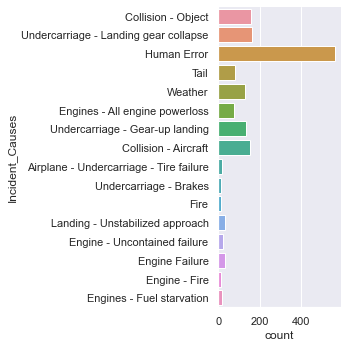

In [47]:
sb.catplot(y = "Incident_Causes", data = Aircraft, kind = "count")

In [48]:
ADT = pd.DataFrame(Aircraft['Aircraft_Age'])
AAG = pd.DataFrame(Aircraft['Aircraft_Damage_Type'])

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
ADT_Train, ADT_Test, AAG_Train, AAG_Test = train_test_split(ADT, AAG, test_size = 0.20)

In [50]:
# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 3)

In [51]:
dectree.fit(ADT_Train, AAG_Train)

DecisionTreeClassifier(max_depth=3)

[Text(669.6, 570.7800000000001, 'Aircraft_Age <= 9.5\ngini = 0.615\nsamples = 1292\nvalue = [65, 709, 232, 286]\nclass = 2'),
 Text(334.8, 407.70000000000005, 'Aircraft_Age <= 5.5\ngini = 0.593\nsamples = 283\nvalue = [33, 167, 32, 51]\nclass = 2'),
 Text(167.4, 244.62, 'Aircraft_Age <= 4.5\ngini = 0.606\nsamples = 172\nvalue = [23, 98, 15, 36]\nclass = 2'),
 Text(83.7, 81.53999999999996, 'gini = 0.594\nsamples = 142\nvalue = [21, 83, 11, 27]\nclass = 2'),
 Text(251.10000000000002, 81.53999999999996, 'gini = 0.638\nsamples = 30\nvalue = [2, 15, 4, 9]\nclass = 2'),
 Text(502.20000000000005, 244.62, 'Aircraft_Age <= 7.5\ngini = 0.564\nsamples = 111\nvalue = [10, 69, 17, 15]\nclass = 2'),
 Text(418.5, 81.53999999999996, 'gini = 0.598\nsamples = 57\nvalue = [4, 33, 10, 10]\nclass = 2'),
 Text(585.9, 81.53999999999996, 'gini = 0.518\nsamples = 54\nvalue = [6, 36, 7, 5]\nclass = 2'),
 Text(1004.4000000000001, 407.70000000000005, 'Aircraft_Age <= 63.5\ngini = 0.617\nsamples = 1009\nvalue = [3

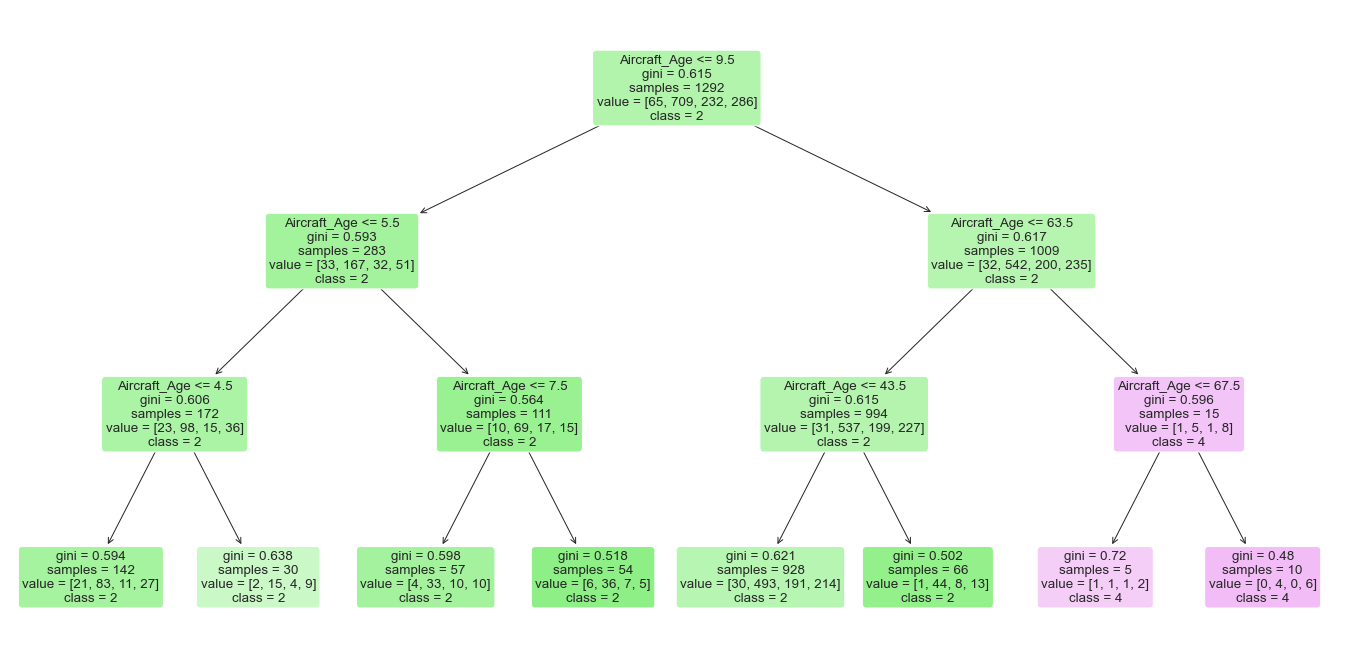

In [52]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(24,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["Aircraft_Age"], 
          class_names=["1","2","3","4"])

In [53]:
AAG_Test_pred = dectree.predict(ADT_Test)

In [54]:
print("Classification Accuracy of test:", dectree.score(ADT_Test,AAG_Test))

Classification Accuracy of test: 0.4984520123839009


<AxesSubplot:>

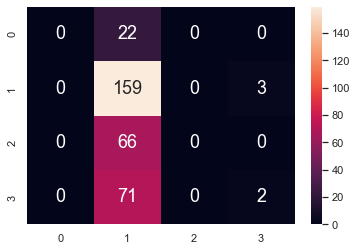

In [55]:
sb.heatmap(confusion_matrix(AAG_Test, AAG_Test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Predicting Aircraft Damage Type with age is not the best due to poor classification accuracy

Predicting Incident Cause with Damage Type

In [56]:
y = pd.DataFrame(Aircraft['Incident_Causes'].astype('category'))
x = pd.DataFrame(Aircraft['Aircraft_Damage_Type'])

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

In [58]:
dectree2 = DecisionTreeClassifier(max_depth = 4)
dectree2.fit(x_train,y_train)

y_test_pred = dectree2.predict(x_test)

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.33746130030959753



<AxesSubplot:>

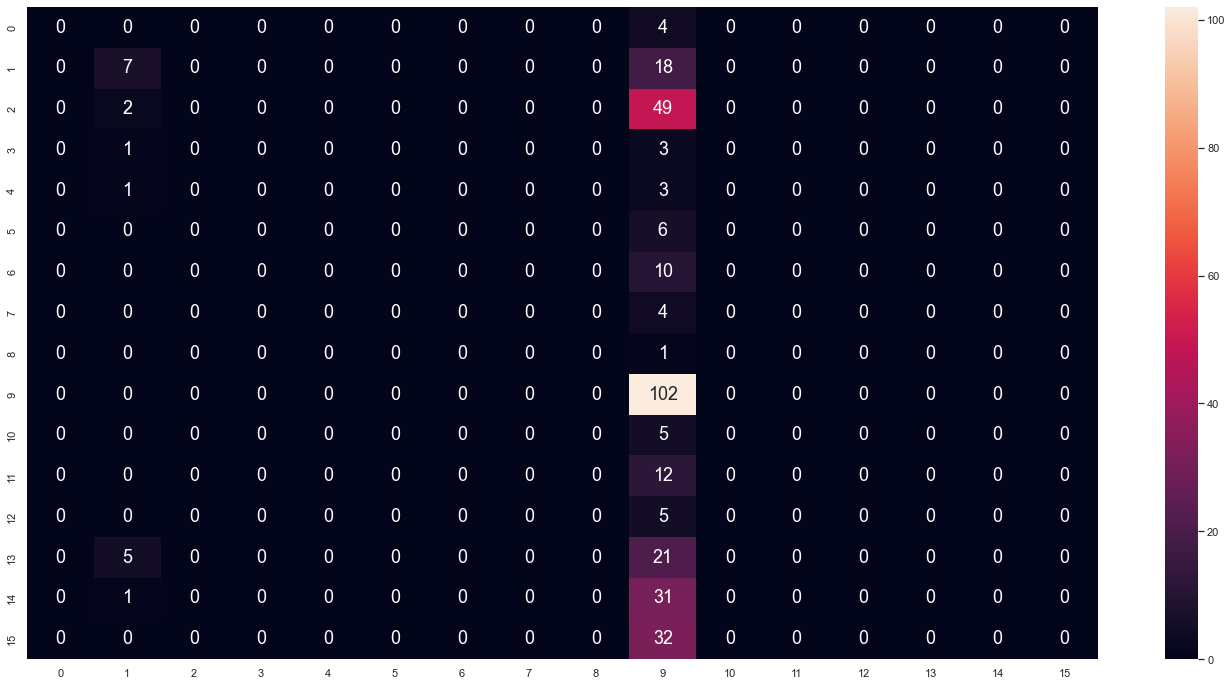

In [59]:
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree2.score(x_test, y_test))
print()

# Plot the Confusion Matrix for Test
f = plt.figure(figsize=(24,12))
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

[Text(669.6, 543.6, 'Aircraft_Damage_Type <= 2.5\ngini = 0.827\nsamples = 1292\nvalue = [14, 126, 105, 11, 18, 27, 67, 17, 11, 461, 26\n69, 7, 106, 130, 97]\nclass = Undercarriage - Brakes'),
 Text(334.8, 326.16, 'Aircraft_Damage_Type <= 1.5\ngini = 0.88\nsamples = 761\nvalue = [12, 106, 80, 3, 13, 8, 31, 8, 7, 147, 19, 65\n5, 93, 115, 49]\nclass = Undercarriage - Brakes'),
 Text(167.4, 108.72000000000003, 'gini = 0.677\nsamples = 70\nvalue = [2, 38, 7, 0, 0, 0, 0, 1, 1, 5, 3, 4, 0, 4\n4, 1]\nclass = Undercarriage - Landing gear collapse'),
 Text(502.20000000000005, 108.72000000000003, 'gini = 0.878\nsamples = 691\nvalue = [10, 68, 73, 3, 13, 8, 31, 7, 6, 142, 16, 61, 5\n89, 111, 48]\nclass = Undercarriage - Brakes'),
 Text(1004.4000000000001, 326.16, 'Aircraft_Damage_Type <= 3.5\ngini = 0.63\nsamples = 531\nvalue = [2, 20, 25, 8, 5, 19, 36, 9, 4, 314, 7, 4, 2\n13, 15, 48]\nclass = Undercarriage - Brakes'),
 Text(837.0, 108.72000000000003, 'gini = 0.718\nsamples = 233\nvalue = [1, 10, 

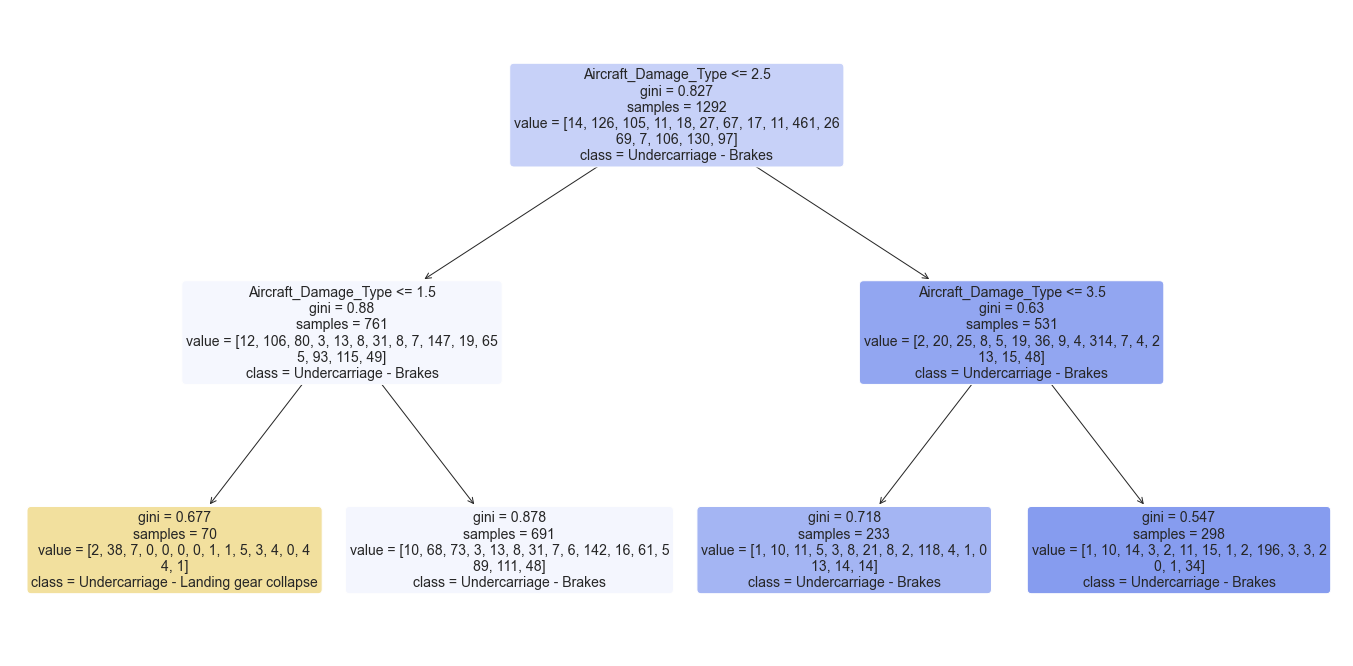

In [60]:
f = plt.figure(figsize=(24,12))
plot_tree(dectree2, filled=True, rounded=True, 
          feature_names=["Aircraft_Damage_Type"], 
          class_names=['Collision - Object', 'Undercarriage - Landing gear collapse',
       'Human Error', 'Tail', 'Weather', 'Engines - All engine powerloss',
       'Undercarriage - Gear-up landing', 'Collision - Aircraft',
       'Airplane - Undercarriage - Tire failure',
       'Undercarriage - Brakes', 'Engine Failure', 'Fire',
       'Landing - Unstabilized approach', 'Engine - Uncontained failure',
       'Engine - Fire', 'Engines - Fuel starvation'])

In [61]:
# Import the encoder from sklearn
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

# OneHotEncoding of categorical predictors (not the response)
creditData_cat = Aircraft[['Aircraft_Model','Incident_Causes']]
ohe.fit(creditData_cat)
creditData_cat_ohe = pd.DataFrame(ohe.transform(creditData_cat).toarray(), 
                                  columns=ohe.get_feature_names(creditData_cat.columns))

# Check the encoded variables
creditData_cat_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1615 entries, 0 to 1614
Data columns (total 74 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Aircraft_Model_AMI                                       1615 non-null   float64
 1   Aircraft_Model_ATR                                       1615 non-null   float64
 2   Aircraft_Model_Airbus                                    1615 non-null   float64
 3   Aircraft_Model_Alenia C-27J Spartan                      1615 non-null   float64
 4   Aircraft_Model_Antonov                                   1615 non-null   float64
 5   Aircraft_Model_Avro                                      1615 non-null   float64
 6   Aircraft_Model_Basler                                    1615 non-null   float64
 7   Aircraft_Model_Beechcraft                                1615 non-null   float64
 8   Aircraft_Model_Boeing       

In [62]:
creditData_cat_ohe.to_csv("creditData_cat_ohe.csv")

In [63]:
# Combining Numeric features with the OHE Categorical features
creditData_num = Aircraft[['Aircraft_Age']].reset_index()
creditData_res = Aircraft['Aircraft_Damage_Type'].reset_index()
creditData_ohe = pd.concat([creditData_num, creditData_cat_ohe, creditData_res], 
                           sort = False, axis = 1).reindex(index=creditData_num.index)

creditData_ohe=creditData_ohe.drop(columns='index')
# Check the final dataframe
creditData_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1615 entries, 0 to 1614
Data columns (total 76 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Aircraft_Age                                             1615 non-null   int32  
 1   Aircraft_Model_AMI                                       1615 non-null   float64
 2   Aircraft_Model_ATR                                       1615 non-null   float64
 3   Aircraft_Model_Airbus                                    1615 non-null   float64
 4   Aircraft_Model_Alenia C-27J Spartan                      1615 non-null   float64
 5   Aircraft_Model_Antonov                                   1615 non-null   float64
 6   Aircraft_Model_Avro                                      1615 non-null   float64
 7   Aircraft_Model_Basler                                    1615 non-null   float64
 8   Aircraft_Model_Beechcraft   

In [64]:
creditData_ohe.to_csv("creditData_ohe.csv")

In [65]:
creditData1 = creditData_ohe.dropna()

In [66]:
creditData1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1615 entries, 0 to 1614
Data columns (total 76 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Aircraft_Age                                             1615 non-null   int32  
 1   Aircraft_Model_AMI                                       1615 non-null   float64
 2   Aircraft_Model_ATR                                       1615 non-null   float64
 3   Aircraft_Model_Airbus                                    1615 non-null   float64
 4   Aircraft_Model_Alenia C-27J Spartan                      1615 non-null   float64
 5   Aircraft_Model_Antonov                                   1615 non-null   float64
 6   Aircraft_Model_Avro                                      1615 non-null   float64
 7   Aircraft_Model_Basler                                    1615 non-null   float64
 8   Aircraft_Model_Beechcraft   

[Text(2008.8000000000002, 1174.1760000000002, 'Incident_Causes_Human Error <= 0.5\ngini = 0.624\nsamples = 1130\nvalue = [65, 609, 207, 249]\nclass = 2'),
 Text(1004.4000000000001, 913.248, 'Incident_Causes_Engine Failure <= 0.5\ngini = 0.52\nsamples = 742\nvalue = [62, 492, 109, 79]\nclass = 2'),
 Text(502.20000000000005, 652.3200000000002, 'Incident_Causes_Collision - Aircraft <= 0.5\ngini = 0.502\nsamples = 715\nvalue = [62, 486, 98, 69]\nclass = 2'),
 Text(251.10000000000002, 391.39200000000005, 'Incident_Causes_Weather <= 0.5\ngini = 0.478\nsamples = 604\nvalue = [28, 421, 93, 62]\nclass = 2'),
 Text(125.55000000000001, 130.46400000000017, 'gini = 0.437\nsamples = 516\nvalue = [28, 377, 75, 36]\nclass = 2'),
 Text(376.65000000000003, 130.46400000000017, 'gini = 0.621\nsamples = 88\nvalue = [0, 44, 18, 26]\nclass = 2'),
 Text(753.3000000000001, 391.39200000000005, 'Aircraft_Age <= 1.5\ngini = 0.557\nsamples = 111\nvalue = [34, 65, 5, 7]\nclass = 2'),
 Text(627.75, 130.4640000000001

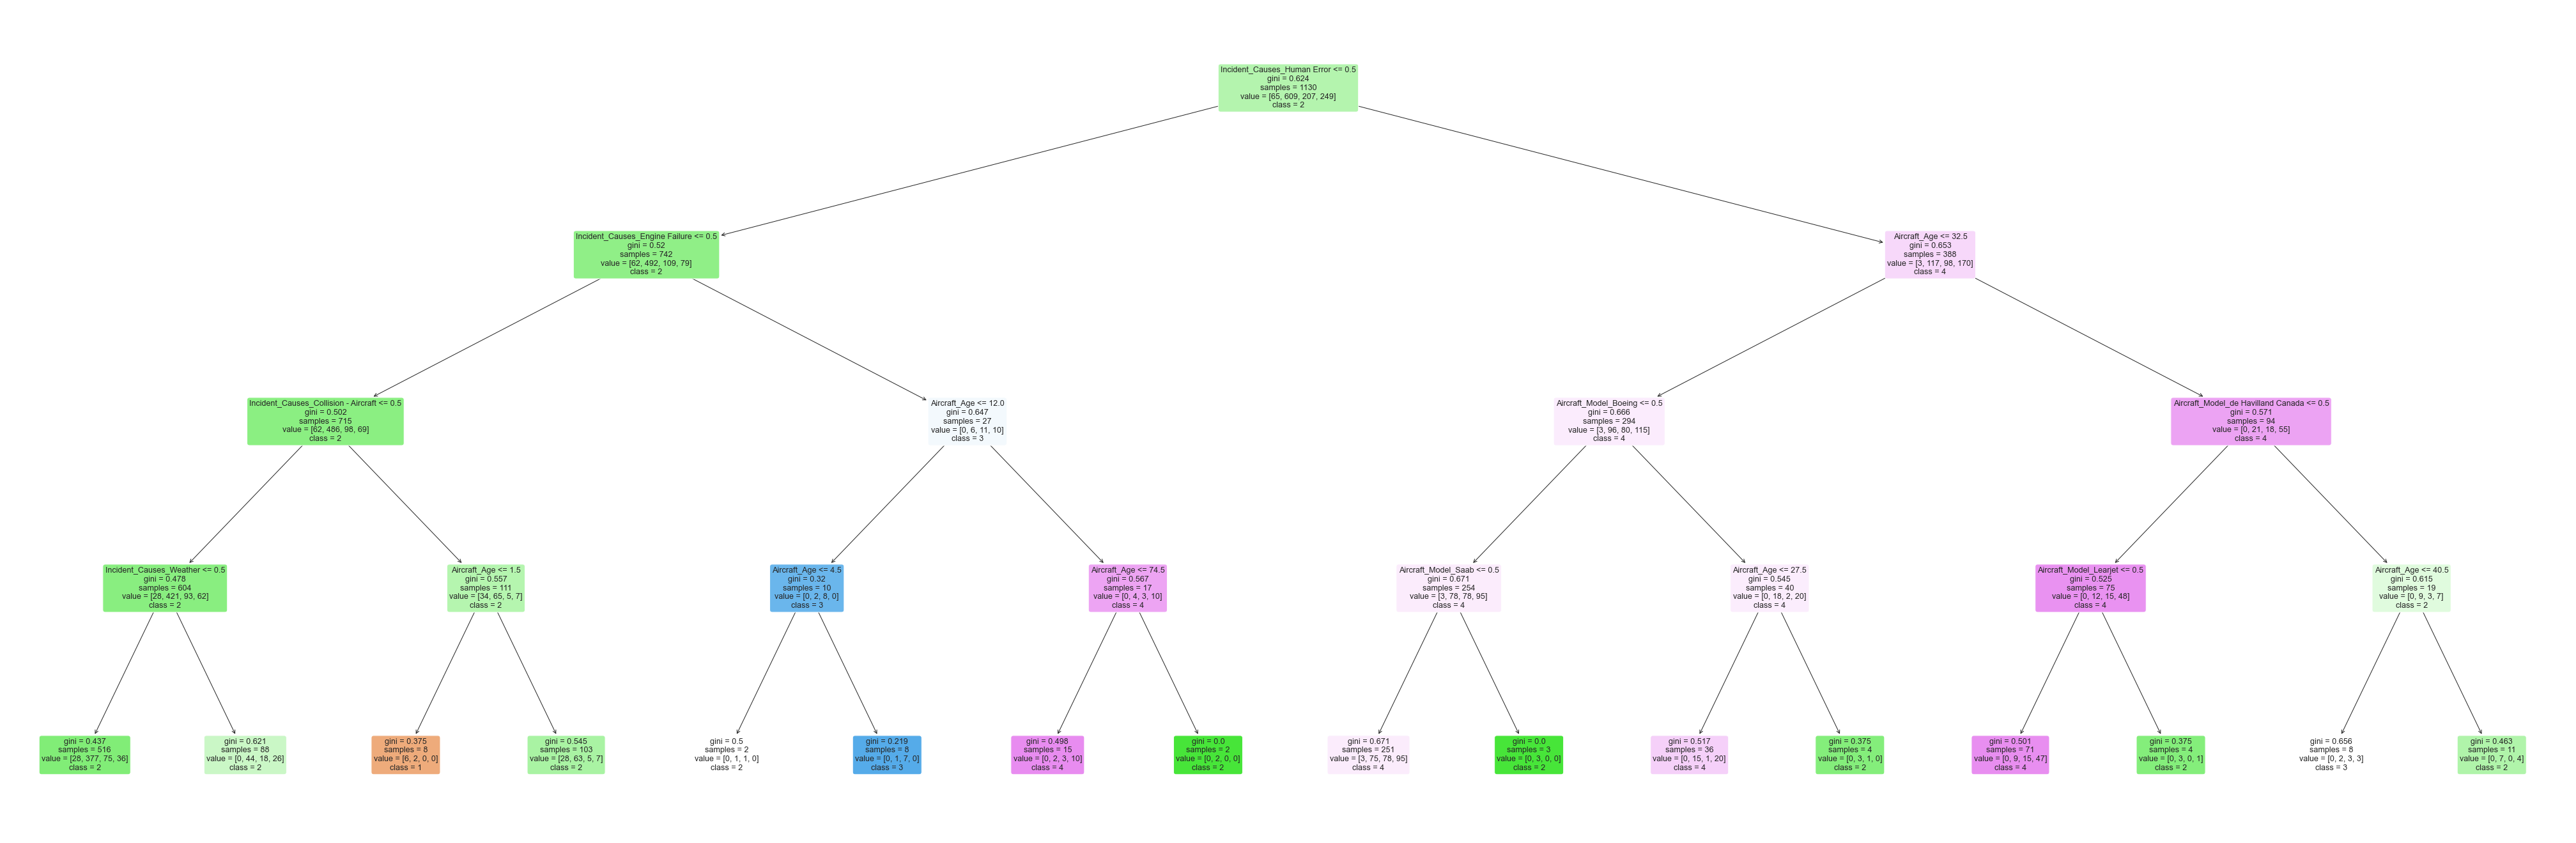

In [67]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

# Extract Response and Predictors
y = pd.DataFrame(creditData1['Aircraft_Damage_Type'])
X = pd.DataFrame(creditData1.drop('Aircraft_Damage_Type', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # change max_depth to experiment
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree
f = plt.figure(figsize=(72,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["1","2","3","4"])

In [68]:
#creditData_ohe.to_csv('check1.csv')